# SPOTIFY EDA REPORT 

In [300]:
pip install seaborn 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\adity\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [301]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\adity\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [302]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [303]:
df = pd.read_csv("spotify-2023.csv",encoding='latin-1' ) # Reading dataset 


## Getting familiar with the data

In [304]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [305]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [306]:
df.shape

(953, 24)

In [307]:
df.describe

<bound method NDFrame.describe of                               track_name      artist(s)_name  artist_count   
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2  \
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_

In [308]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

## Cleaning dataset

In [309]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [310]:
df.drop_duplicates(inplace = True)

In [311]:
df.shape         #no duplicate values

(953, 24)

In [312]:
df['artist(s)_name'].nunique()

645

In [313]:
# Removing Redundant columns
df.drop(columns = ['track_name','artist(s)_name'], inplace = True)
df

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703,43,263,45,...,125,B,Major,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286,48,126,58,...,92,C#,Major,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974,94,207,91,...,138,F,Major,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817,116,207,125,...,170,A,Major,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322,84,133,87,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,2022,11,3,953,0,91473363,61,13,37,...,144,A,Major,60,24,39,57,0,8,3
949,1,2022,10,21,1180,0,121871870,4,0,8,...,166,F#,Major,42,7,24,83,1,12,6
950,2,2022,11,3,573,0,73513683,2,0,7,...,92,C#,Major,80,81,67,4,0,8,6
951,3,2022,10,20,1320,0,133895612,29,26,17,...,97,C#,Major,82,67,77,8,0,12,5


## Data Analysis and Modelling

In [314]:
df.released_year.nunique()

50

In [315]:
selected_columns = [
  'in_spotify_charts','in_apple_charts','in_deezer_charts'
]
df['in_charts'] = df[selected_columns].sum(axis=1)
#creating aggregated column for overall popularity of song based on number of charts the song has been on in all platforms


In [316]:
df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts
0,2,2023,7,14,553,147,141381703,43,263,45,...,B,Major,80,89,83,31,0,8,4,420
1,1,2023,3,23,1474,48,133716286,48,126,58,...,C#,Major,71,61,74,7,0,10,4,188
2,1,2023,6,30,1397,113,140003974,94,207,91,...,F,Major,51,32,53,17,0,31,6,334
3,1,2019,8,23,7858,100,800840817,116,207,125,...,A,Major,55,58,72,11,0,11,15,319
4,1,2023,5,18,3133,50,303236322,84,133,87,...,A,Minor,65,23,80,14,63,11,6,198


In [317]:
#Creating a new datetime column to understand the effect of release day on songs success better

df["released_date"] = df['released_day'].astype(str) + "-" + df['released_month'].astype(str) + "-" + df['released_year'].astype(str)

In [318]:
df['released_date'] = pd.to_datetime(df['released_date'])

C:\Users\adity\AppData\Local\Temp\ipykernel_10656\101519970.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['released_date'] = pd.to_datetime(df['released_date'])


In [319]:
df['weekday'] = df['released_date'].dt.dayofweek

In [320]:
#dont need three seperate columns now

columns = ['released_year' , 'released_month' , 'released_day']
df.drop(columns, axis = 1)

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts,released_date,weekday
0,2,553,147,141381703,43,263,45,10,826,125,...,80,89,83,31,0,8,4,420,2023-07-14,4
1,1,1474,48,133716286,48,126,58,14,382,92,...,71,61,74,7,0,10,4,188,2023-03-23,3
2,1,1397,113,140003974,94,207,91,14,949,138,...,51,32,53,17,0,31,6,334,2023-06-30,4
3,1,7858,100,800840817,116,207,125,12,548,170,...,55,58,72,11,0,11,15,319,2019-08-23,4
4,1,3133,50,303236322,84,133,87,15,425,144,...,65,23,80,14,63,11,6,198,2023-05-18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,953,0,91473363,61,13,37,1,0,144,...,60,24,39,57,0,8,3,14,2022-11-03,3
949,1,1180,0,121871870,4,0,8,0,0,166,...,42,7,24,83,1,12,6,0,2022-10-21,4
950,2,573,0,73513683,2,0,7,0,0,92,...,80,81,67,4,0,8,6,0,2022-11-03,3
951,3,1320,0,133895612,29,26,17,0,0,97,...,82,67,77,8,0,12,5,26,2022-10-20,3


In [323]:
# Converting Data Types of the categorical or object columns into numerical columns

df['streams'] = pd.to_numeric(df['streams'], errors='coerce') 
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce') #converting object datatypes to float
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce') 
df["mode"] = df["mode"].map({"Minor": 0, "Major": 1})  # converting non-numerical data into numerical format

In [324]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def Label_enc(param):      # defining a function to encode key values
    LabelE = LabelEncoder()    # creating new instance of class LabelEncoder
    LabelE.fit(param)          #  fitting the input to encoder
    print(param.name,LabelE.classes_)
    return LabelE.transform(param)      #   transforming method of the LabelEncoder object to encode the input data, and returns the encoded data as a new pandas Series object.

     

In [326]:
df["key"] = Label_enc(df["key"])

key ['A' 'A#' 'B' 'C#' 'D' 'D#' 'E' 'F' 'F#' 'G' 'G#' nan]


In [321]:
df['weekday'].value_counts()  #checking if popularity has anything to do with the day of its release

weekday
4    526
3    155
2     87
1     65
0     60
6     37
5     23
Name: count, dtype: int64

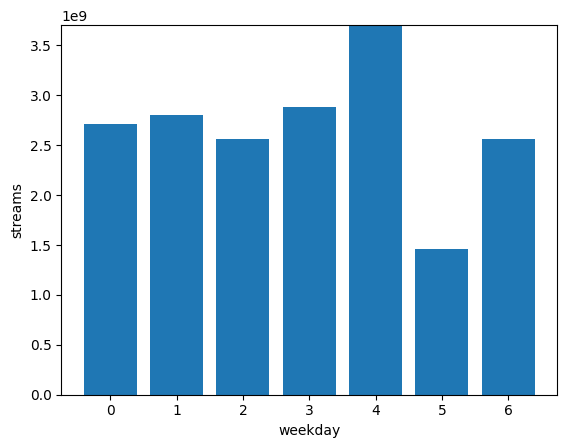

In [353]:
plt.bar(df['weekday'], df['streams'])

# Adding labels and title
plt.xlabel('weekday')
plt.ylabel('streams')
plt.ylim(0, top = max(df['streams']))
plt.show()
     

<Axes: xlabel='key', ylabel='count'>

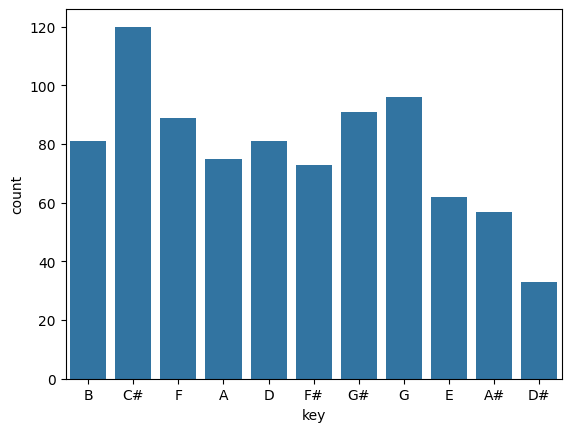

In [325]:
sns.countplot(x="key", data=df)     # countplot for 'key'

<Axes: xlabel='key', ylabel='count'>

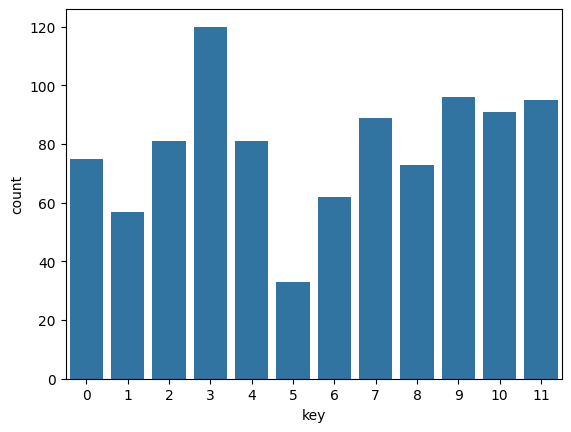

In [327]:
sns.countplot(x="key", data=df)     # countplot for 'key'

In [328]:
df.dtypes

artist_count                     int64
released_year                    int64
released_month                   int64
released_day                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                        float64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists            float64
in_deezer_charts                 int64
in_shazam_charts               float64
bpm                              int64
key                              int32
mode                             int64
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
in_charts                        int64
released_date           datetime64[ns]
weekday                          int32
dtype: object

In [329]:
df.info

<bound method DataFrame.info of      artist_count  released_year  released_month  released_day   
0               2           2023               7            14  \
1               1           2023               3            23   
2               1           2023               6            30   
3               1           2019               8            23   
4               1           2023               5            18   
..            ...            ...             ...           ...   
948             1           2022              11             3   
949             1           2022              10            21   
950             2           2022              11             3   
951             3           2022              10            20   
952             1           2022              11             4   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists   
0                     553                147  141381703.0                  43  \
1            

### Using visualization/plots to understand relationships among attributes.

<Axes: xlabel='streams', ylabel='Count'>

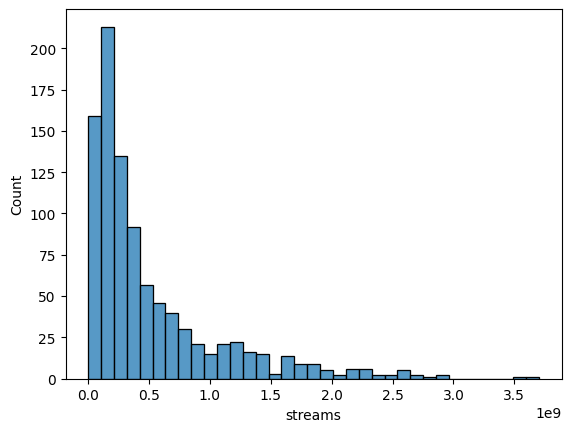

In [330]:
sns.histplot(df['streams']) #analyzing the distribution of streams

## Highly correlated features

In [331]:
# Correlations between variables with consideration of streams as a success metric
success_metric = 'streams' 
correlations = df.corr()[success_metric]
print("Correlations with success metric:\n", correlations)

Correlations with success metric:
 artist_count           -0.136463
released_year          -0.230803
released_month         -0.024938
released_day            0.010598
in_spotify_playlists    0.789822
in_spotify_charts       0.245821
streams                 1.000000
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_deezer_playlists     0.746022
in_deezer_charts        0.228598
in_shazam_charts        0.056881
bpm                    -0.002438
key                    -0.017289
mode                    0.042635
danceability_%         -0.105457
valence_%              -0.040831
energy_%               -0.026051
acousticness_%         -0.004485
instrumentalness_%     -0.044902
liveness_%             -0.048337
speechiness_%          -0.112333
in_charts               0.335744
released_date          -0.230814
weekday                -0.076228
Name: streams, dtype: float64


In [276]:
# Identifying  highly correlated features
highly_correlated_features = correlations[abs(correlations) > 0.4].index.tolist()
highly_correlated_features

['in_spotify_playlists',
 'streams',
 'in_apple_playlists',
 'in_deezer_playlists']

<Axes: >

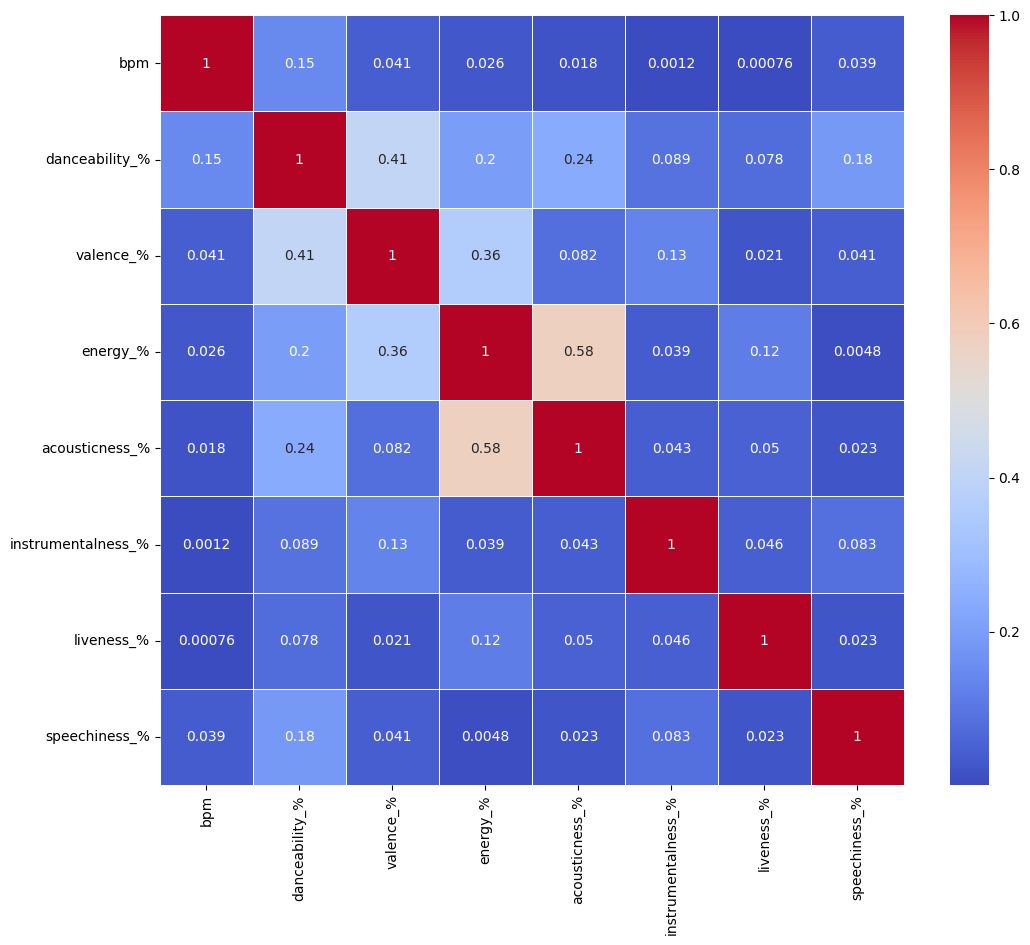

In [275]:
col = ['bpm', 'danceability_%','valence_%','energy_%', 'acousticness_%','instrumentalness_%','liveness_%', 'speechiness_%']
df_copy = df[col]
corr = df_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(abs(corr), annot=True, linewidths=.5,  cmap="coolwarm")

C:\Users\adity\AppData\Local\Temp\ipykernel_10656\3397285302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna( value = X.mean() , inplace=True)


highly correlated features are : ['in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_deezer_playlists']
Feature importance:
 [ 7.83428230e-11  1.00000000e+00  1.58893520e-10 -1.25262952e-11]


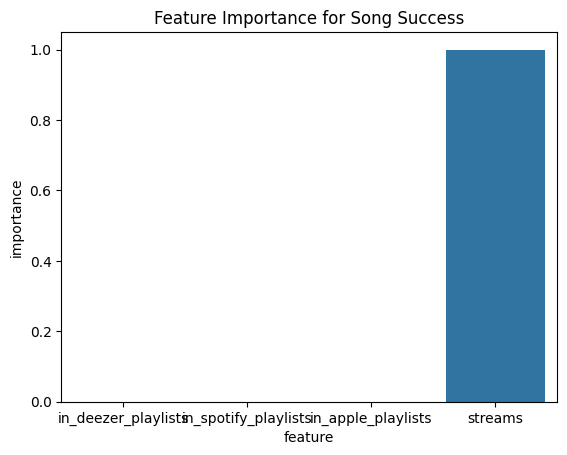

In [352]:
#Building a regression model to understand and quantify feature importance better 

from sklearn.linear_model import LinearRegression
X = df[highly_correlated_features]
X.fillna( value = X.mean() , inplace=True)   #filling na to maintain a uniform size of the input
y = df[success_metric]
y.fillna(value = y.mean(), inplace=True)
model = LinearRegression()
model.fit(X, y)

# Printing feature coefficients (higher absolute values indicate stronger influence)
print(f"highly correlated features are : {highly_correlated_features}")
print("Feature importance:\n", model.coef_)

# Visualizing feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})
feature_importance.sort_values('importance', inplace=True)
sns.barplot(x='feature', y='importance', data=feature_importance)
plt.title("Feature Importance for Song Success")
plt.show()

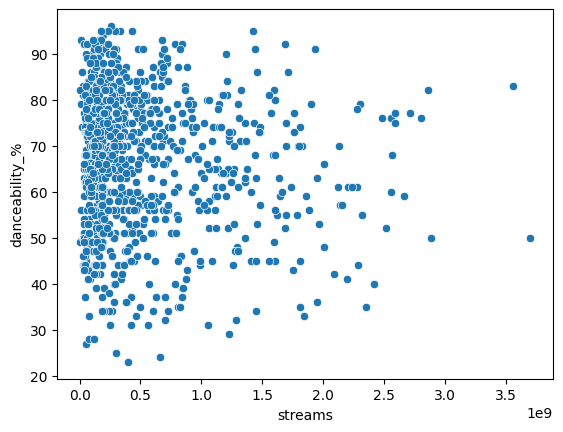

In [277]:
# Relationships between success metrics and song attributes
sns.scatterplot(x='streams', y='danceability_%', data=df)
plt.show()

Text(0, 0.5, 'streams')

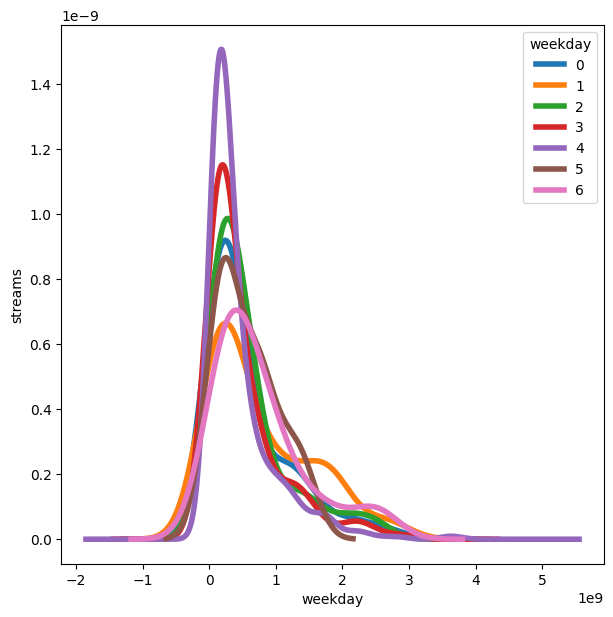

In [278]:
# Relation between Weekday and streams

# converting data into wide-format
data_wide = df.pivot(columns='weekday',
                     values='streams')
# plotting
data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("weekday")
plt.ylabel("streams")

# Songs which are released on Weekend (Friday) are more likely to be a success 

In [279]:
# Assuming success metric
success_metric = 'streams'

# Analyzing relationships with song attributes
correlation = df[success_metric].corr(df['danceability_%'])
print("Correlation between streams and danceability:", correlation)


Correlation between streams and danceability: -0.10545688369141905


In [280]:
correlation = df[success_metric].corr(df['bpm'])
print("Correlation between streams and danceability:", correlation)


Correlation between streams and danceability: -0.0024379081382718023


In [281]:
correlation = df[success_metric].corr(df['acousticness_%'])
print("Correlation between streams and danceability:", correlation)


Correlation between streams and danceability: -0.004484652700684072


# Which song attributes significantly contribute to the number of streams?

In [282]:
pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\adity\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [354]:
import statsmodels.api as sm

# Selecting features for the model
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']
X = df[features]
y = df['streams']

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.028
Date:                Mon, 15 Jan 2024   Prob (F-statistic):             0.0102
Time:                        23:57:28   Log-Likelihood:                -20552.
No. Observations:                 953   AIC:                         4.112e+04
Df Residuals:                     947   BIC:                         4.115e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.288e+08   1.37

# Is there a significant difference in average streams for songs in different keys (i.e., major vs. minor)?

In [363]:
# Separate data based on key
major_songs = df[df['key'] == 1]
minor_songs = df[df['key'] == 0]

# Conduct t-test for independent samples
t_test, p_value = stats.ttest_ind(major_songs['streams'], minor_songs['streams'])

# Print results
print("P-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in streams between major and minor songs.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

P-value: 0.1205233102258198
Fail to reject the null hypothesis: No significant difference found.


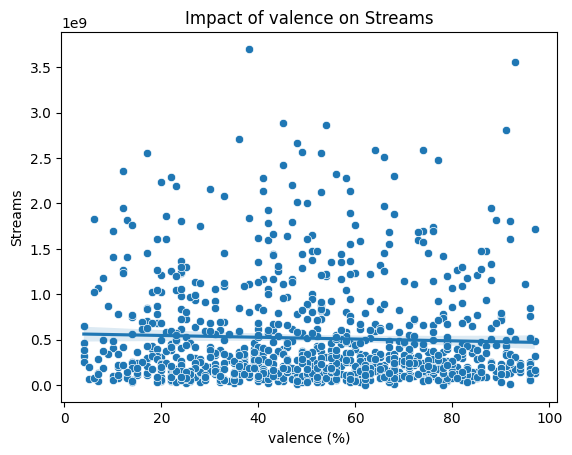

In [287]:
#scatter plot 
sns.scatterplot(x=df["valence_%"], y=df["streams"])
sns.regplot(x=df["valence_%"], y=df["streams"], scatter=False)
plt.title("Impact of valence on Streams")
plt.xlabel("valence (%)")
plt.ylabel("Streams")
plt.show()

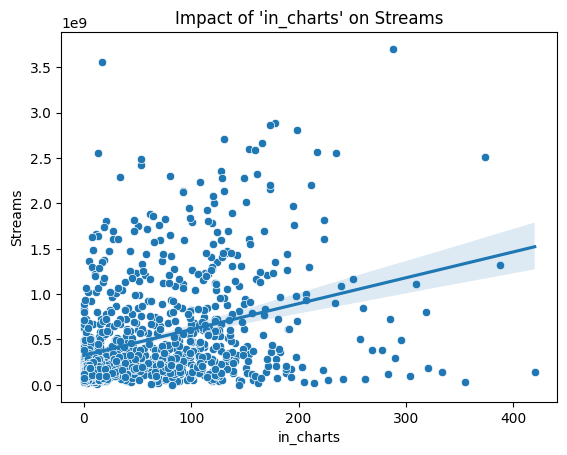

In [288]:
sns.scatterplot(x=df["in_charts"], y=df["streams"])
sns.regplot(x=df["in_charts"], y=df["streams"], scatter=False)
plt.title("Impact of 'in_charts' on Streams")
plt.xlabel("in_charts")
plt.ylabel("Streams")
plt.show()

In [364]:
# Regression analysis on Artist count vs streams
X = df[['artist_count']]
y = df['streams']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("Regression results for artist count")
print(model.summary())


Regression results for artist count
                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     18.04
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           2.38e-05
Time:                        00:03:05   Log-Likelihood:                -20551.
No. Observations:                 953   AIC:                         4.111e+04
Df Residuals:                     951   BIC:                         4.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const       

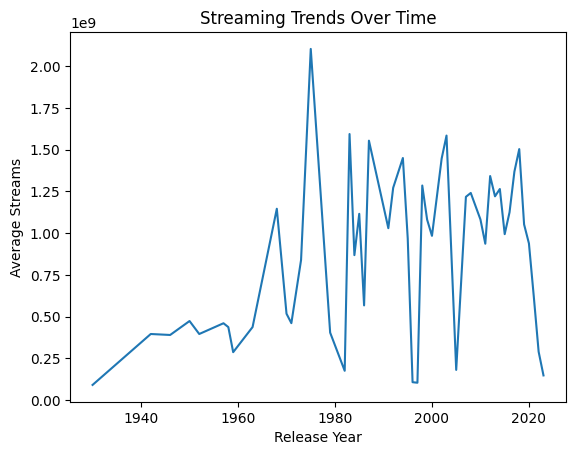

In [365]:
#Analyzing temporal trends over the year

df.groupby('released_year')['streams'].mean().plot(kind='line')
plt.xlabel("Release Year")
plt.ylabel("Average Streams")
plt.title("Streaming Trends Over Time")
plt.show()


# Can we predict a song's chart performance based on its audio features like energy or acousticness?

In [366]:
features = ['danceability_%', 'energy_%', 'acousticness_%']
X = df[features]
y = df['in_charts'] > 100  # defining threshold of minimun charts.

# Spliting data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Training a classification model- using logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model accuracy
accuracy = model.score(X_test, y_test)
print("Current accuracy is {}%".format(accuracy*100))

Current accuracy is 72.25130890052355%


### Do Songs with multiple artists tend to perform better

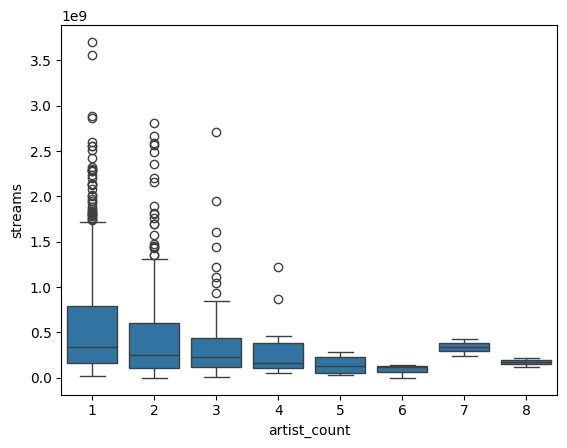

In [367]:
# Plot distribution of streams for different artist counts
sns.boxplot(x='artist_count', y='streams', data=df)
plt.show()

### How do audio features relate to song valence (positive/negative emotion)?

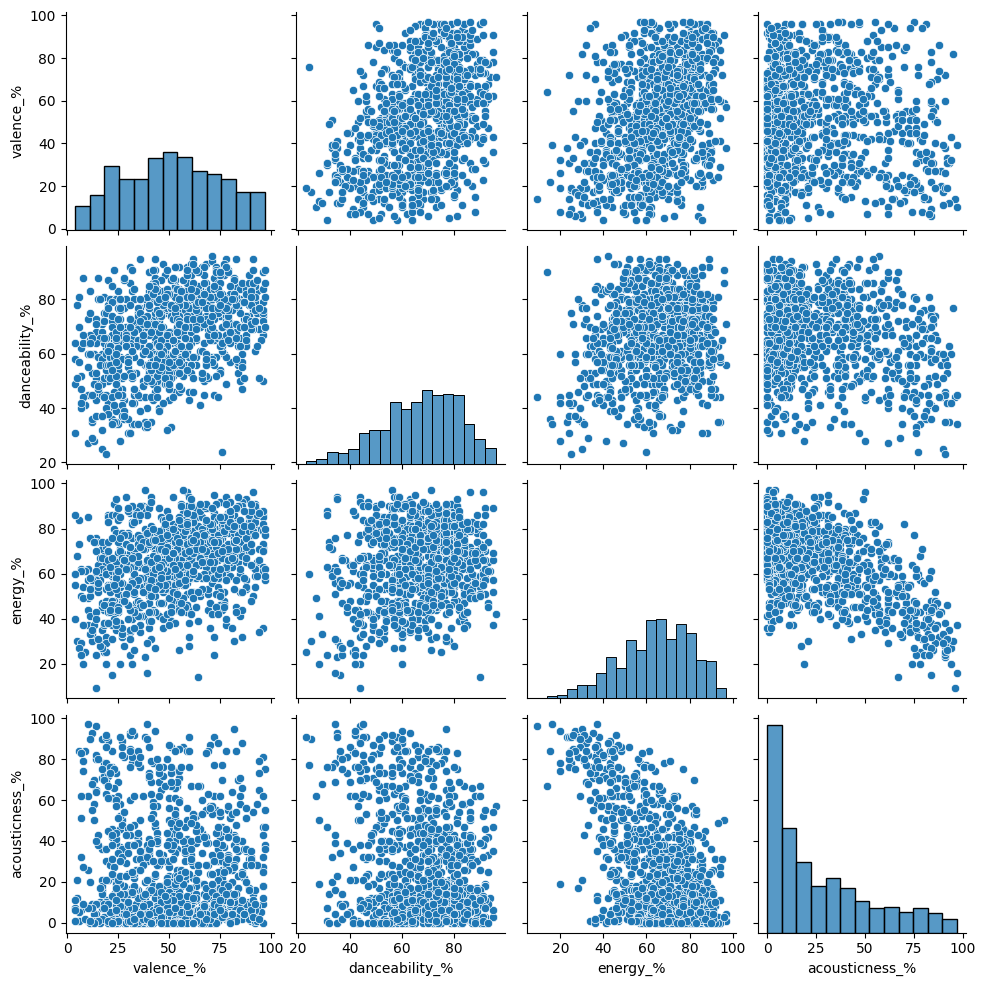

In [368]:
# Creating a scatter matrix of audio features and valence
sns.pairplot(df[['valence_%', 'danceability_%', 'energy_%', 'acousticness_%']])
plt.show()

In [369]:
# Calculate correlations
correlations = df[['valence_%', 'danceability_%', 'energy_%', 'acousticness_%']].corr()
print(correlations)

                valence_%  danceability_%  energy_%  acousticness_%
valence_%        1.000000        0.408451  0.357612       -0.081907
danceability_%   0.408451        1.000000  0.198095       -0.236165
energy_%         0.357612        0.198095  1.000000       -0.577344
acousticness_%  -0.081907       -0.236165 -0.577344        1.000000


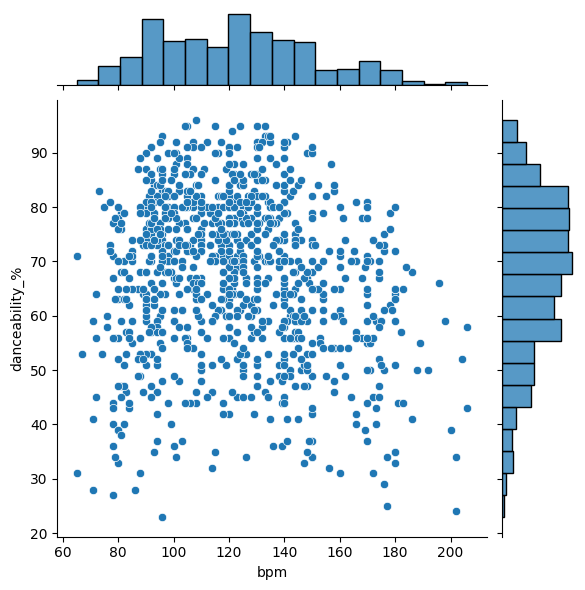

In [370]:
# Create a joint plot of tempo and danceability to check if user's preference alligns for both or not.
sns.jointplot(x='bpm', y='danceability_%', data=df)
plt.show()